## Naming Trends project

In [2]:
import pandas as pd
from zipfile import ZipFile
import io

In [3]:
filename = 'D:/DSA-M/PythonCC/Projects/Naming_trends/names.zip'
#print(filename)

df=pd.DataFrame()

with ZipFile(filename) as myzip:
    for fname in  myzip.namelist():
        if fname.endswith('.txt'):
            insideDF = pd.read_csv(io.BytesIO(myzip.read(fname)), header=None, delimiter=',')
            insideDF['year']=fname[3:7]
            insideDF['year']=insideDF['year'].astype(int)
            df = pd.concat([df, insideDF])

df.columns=['Name','Gender','Count','Year']

groupedF= df.loc[df.Gender=='F'].groupby(['Year','Gender'])
groupedM= df.loc[df.Gender=='M'].groupby(['Year','Gender'])
grouped_YG = df.groupby(['Year','Gender']).agg({'Count':sum}).reset_index() 
grouped_NG = df.groupby(['Name','Gender']).agg({'Count':sum}).reset_index().sort_values('Count', ascending=False)
top5 = pd.concat([grouped_NG[grouped_NG['Gender']=='M'].nlargest(5,'Count'),
                grouped_NG[grouped_NG['Gender']=='F'].nlargest(5,'Count')])



### Data Analysis

#### Display Range of Data and display dataset between 1950-2000

In [6]:
print(f"Range of data: Year-{df['Year'].min()} to {df['Year'].max()}\n")

df[df['Year'].between(1950,2000)]

Range of data: Year-1880 to 2018



,Name,Gender,Count,Year
0,Linda,F,80431,1950
1,Mary,F,65481,1950
2,Patricia,F,47945,1950
3,Barbara,F,41552,1950
4,Susan,F,38017,1950
...,...,...,...,...
29767,Zeph,M,5,2000
29768,Zeven,M,5,2000
29769,Ziggy,M,5,2000
29770,Zo,M,5,2000


#### Top Female Name trends over the years

In [7]:
groupedF.head(1)

,Name,Gender,Count,Year
0,Mary,F,7065,1880
0,Mary,F,6919,1881
0,Mary,F,8148,1882
0,Mary,F,8012,1883
0,Mary,F,9217,1884
...,...,...,...,...
0,Emma,F,20936,2014
0,Emma,F,20455,2015
0,Emma,F,19496,2016
0,Emma,F,19800,2017


#### Top Male Name trends over the years

In [8]:
print(groupedM.head(1))

       Name Gender  Count  Year
942    John      M   9655  1880
938    John      M   8769  1881
1028   John      M   9557  1882
1054   John      M   8894  1883
1172   John      M   9388  1884
...     ...    ...    ...   ...
19191  Noah      M  19305  2014
19091  Noah      M  19635  2015
18836  Noah      M  19117  2016
18375  Liam      M  18798  2017
18029  Liam      M  19837  2018

[139 rows x 4 columns]


#### Male/Female birth counts over the years - sample 1900-1920

In [9]:
print(grouped_YG[grouped_YG['Year'].between(1900,1920)])

    Year Gender    Count
40  1900      F   299798
41  1900      M   150480
42  1901      F   239345
43  1901      M   106469
44  1902      F   264076
45  1902      M   122659
46  1903      F   261971
47  1903      M   119232
48  1904      F   275363
49  1904      M   128126
50  1905      F   291619
51  1905      M   132311
52  1906      F   295302
53  1906      M   133157
54  1907      F   318566
55  1907      M   146829
56  1908      F   334314
57  1908      M   154337
58  1909      F   347230
59  1909      M   163998
60  1910      F   396505
61  1910      M   194212
62  1911      F   418309
63  1911      M   225970
64  1912      F   558121
65  1912      M   429945
66  1913      F   624547
67  1913      M   512567
68  1914      F   761580
69  1914      M   654764
70  1915      F   983865
71  1915      M   848592
72  1916      F  1044341
73  1916      M   890094
74  1917      F  1081275
75  1917      M   925494
76  1918      F  1157638
77  1918      M  1013488
78  1919      F  1130130


#### Overall Top-5 Male/Female names

In [10]:
print(top5)

             Name Gender    Count
43582       James      M  5164280
48388        John      M  5124817
84427      Robert      M  4820129
71023     Michael      M  4362731
104615    William      M  4117369
68679        Mary      F  4125675
30706   Elizabeth      F  1638349
79184    Patricia      F  1572016
46567    Jennifer      F  1467207
62973       Linda      F  1452668


### Data visualization

##### Gender wise birth count for sample years 1900-1920

Text(0.5, 1.0, 'Gender wise birth count per Year')

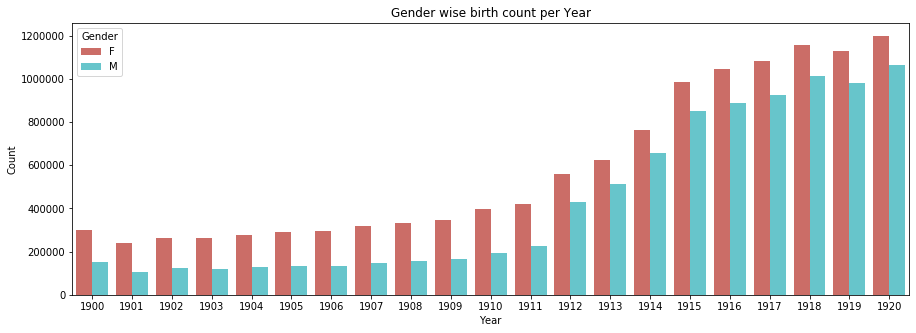

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
Fig=plt.figure(figsize=(15,5))
sns.barplot(x='Year', y='Count', hue='Gender', data=grouped_YG[grouped_YG['Year'].between(1900,1920)],palette='hls')
plt.title("Gender wise birth count per Year")

##### Gender wise top-5 names overall

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

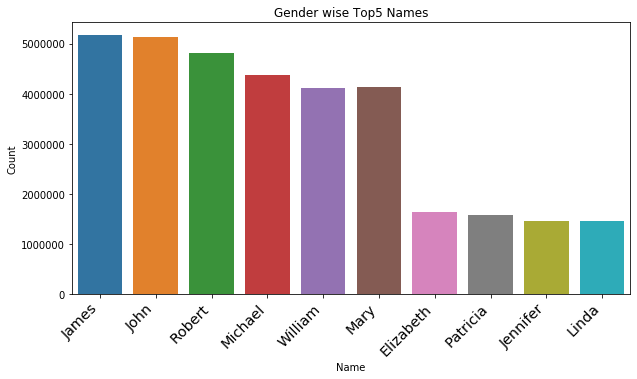

In [12]:
Fig=plt.figure(figsize=(10,5))
sns.barplot(x='Name', y='Count', data=top5)
plt.title("Gender wise Top5 Names")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)